In [5]:
#!pip install pandas
#!pip install numpy
#!pip install seaborn

In [6]:
import pandas as pd
import os
import numpy as np

#### Merge the 12 months of sales date into a single CSV file

In [7]:
files = [file for file in os.listdir("/Users/trinhbich/Desktop/Python-portfolio-project/Sales_Data")]

all_months_data = pd.DataFrame()

# make a loop to concat the data
for file in files: 
    df = pd.read_csv("/Users/trinhbich/Desktop/Python-portfolio-project/Sales_Data/" + file) 
    all_months_data = pd.concat([all_months_data, df])

# export all data to csv
all_months_data.to_csv("all_data.csv", index=False)



#### Read in updated DataFrame

In [8]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Preprocessing

Data information

In [9]:
# Getting the information
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Variables category

In [10]:
categorical = all_data.select_dtypes(['category','object']).columns
for col in categorical:
    print('{} : {} unique value(s)'.format(col,all_data[col].nunique()))

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


Missing data points

In [11]:
# How many missing data points per columns?
missing_values_count = all_data.isnull().sum()

# look at the # of missing points in the first 10 columns
missing_values_count[0:10]

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Whate percentage of the values in our dataset?

In [12]:
total_cells = np.product(all_data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells)*100
print(f"{percent_missing: .2f}%")

 0.29%


### Clean up the data

#### Drop rows of NAN

In [13]:
# NAN values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
# Drop the rows of NAN data
all_data = all_data.dropna(how='all')
# Clean Future Warnings 'OR'
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Convert columns to the correct type

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Convert Quantity Ordered column and Price Each column to categorical data type

In [15]:
# Convert the data
all_data['Quantity Ordered'], all_data['Price Each'] = all_data['Quantity Ordered'].astype('int64'), all_data['Price Each'].astype('float')

# Check the resutl
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


#### Convert Order Date column to datetime data type

In [16]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


Recap Data:
- DataFrame has total 186.850 records and 6 columns cateogircal type
- The number of missing value accounts for 0.29%
- Order ID: 178438 unique value(s)
- Product: 20 unique value(s)
- Price Each: 24 unique value(s)
- Order Date: 142396 unique value(s)
- Purchase Address: 140788 unique value(s)

### Data preparation

##### Augment data with additional colums

 Add Month, Hour, Minute, Sales, Cities Column

In [17]:
def augment_data(data):
    # Get the City in 'Purchase Address'
    def get_city(address):
        return address.split(',')[1]
    
    # Get the State in 'Purchase Address'
    def get_state(address):
        return address.split(',')[2].split(' ')[1]
    
    # Get month data
    all_data['Month'] =all_data['Order Date'].dt.month
    
    # Get Hour data
    data['Hour'] = data['Order Date'].dt.hour
    
    # Get Minute data
    data['Minute'] = data['Order Date'].dt.minute
    
    # Add Sales column 
    data['Sale'] = data['Quantity Ordered'] * data['Price Each']
    
    # Get Cities Data
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
    return data

all_data = augment_data(all_data)
all_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Sale,Cities
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,1,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,3,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,21,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,13,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,38,11.95,Atlanta (GA)


# Question 1: What was the best month for sales? How much was earned that month?

Sales group by Month

In [18]:
all_data.groupby('Month').sum().astype('int')

/var/folders/gp/f38rtsr54tjcmrfz0qlps2b00000gn/T/ipykernel_34550/2726552841.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Month').sum().astype('int')


,Quantity Ordered,Price Each,Hour,Minute,Sale
Month,,,,,
1,10903,1811768,139485,282440,1822256
2,13449,2188884,172669,354885,2202022
3,17005,2791207,218969,447559,2807100
4,20558,3367671,262259,544186,3390670
5,18667,3135125,238780,487899,3152606
6,15253,2562025,195528,402436,2577802
7,16072,2632539,206169,417349,2647775
8,13448,2230345,172289,353857,2244467
9,13109,2084992,168513,341698,2097560


Tao bieu do de xem su bien dong cua Doanh so theo tung thang

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/gp/f38rtsr54tjcmrfz0qlps2b00000gn/T/ipykernel_34550/922168153.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sale = all_data.groupby('Month').sum().astype('int')


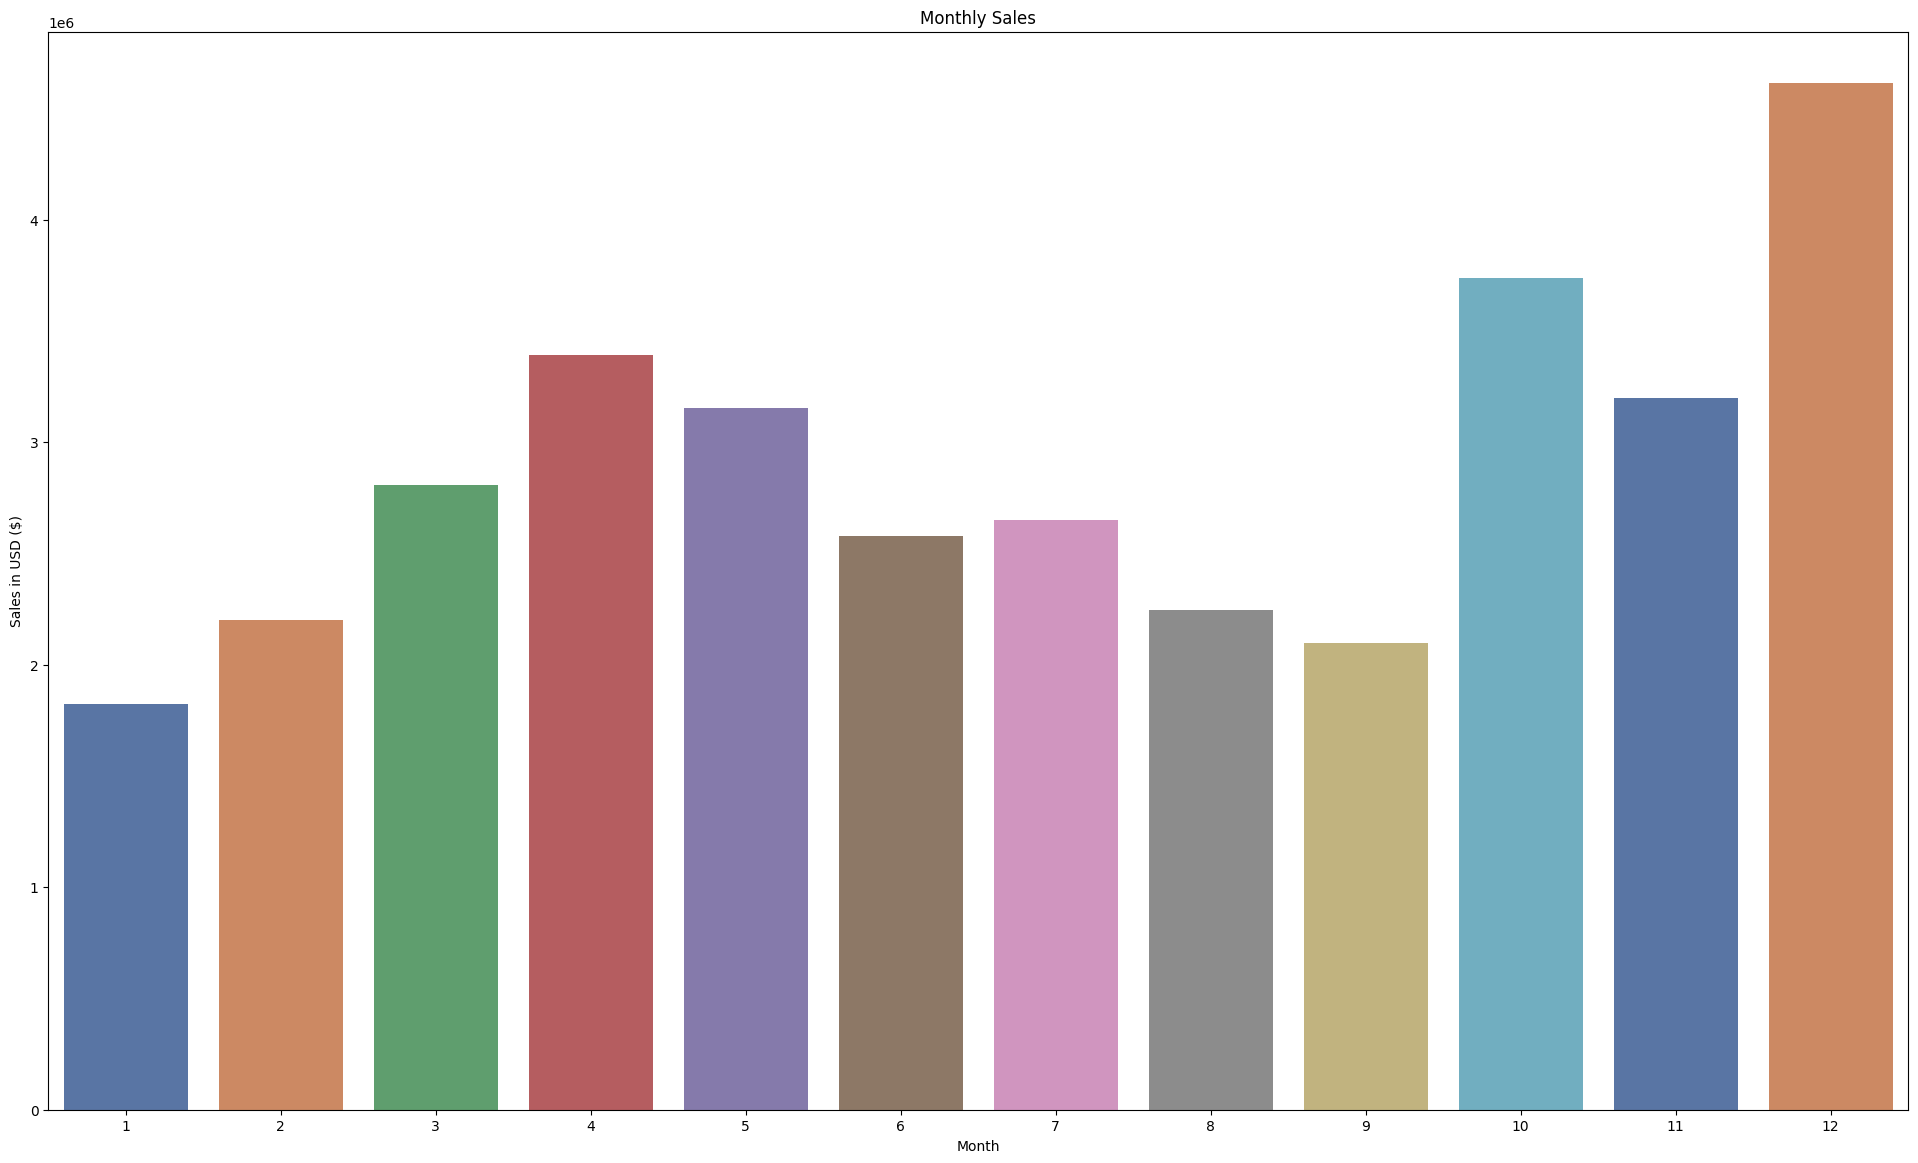

In [20]:
# Group the Sale by month
monthly_sale = all_data.groupby('Month').sum().astype('int')
# Make a plot
plt.figure(figsize=(24, 14))
sns.barplot(
    x = monthly_sale.index,
    y = monthly_sale['Sale'],
    data = monthly_sale,
    palette='deep'
)

# Add plot title
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.show()




Answer for Question 1: 
- December was the best month for sales: $4.613.443


### Question 2: What City had the highest number of sales?

In [21]:
all_data.groupby('Cities').sum().astype(int)

/var/folders/gp/f38rtsr54tjcmrfz0qlps2b00000gn/T/ipykernel_34550/4103450659.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Cities').sum().astype(int)


,Quantity Ordered,Price Each,Month,Hour,Minute,Sale
Cities,,,,,,
Atlanta (GA),16602,2779908,104794,214264,442932,2795498
Austin (TX),11153,1809873,69829,141946,289060,1819581
Boston (MA),22528,3637409,141112,288225,590442,3661642
Dallas (TX),16730,2752627,104620,214390,435155,2767975
Los Angeles (CA),33289,5421435,208325,427444,866638,5452570
New York City (NY),27932,4635370,175741,357696,733598,4664317
Portland (ME),2750,447189,17144,35211,72856,449758
Portland (OR),11303,1860558,70621,144421,295533,1870732
San Francisco (CA),50239,8211461,315520,643265,1319477,8262203


/var/folders/gp/f38rtsr54tjcmrfz0qlps2b00000gn/T/ipykernel_34550/2455582194.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_gb_cities = all_data.groupby('Cities').sum().astype(int)


Text(0, 0.5, 'Sales in USD ($)')

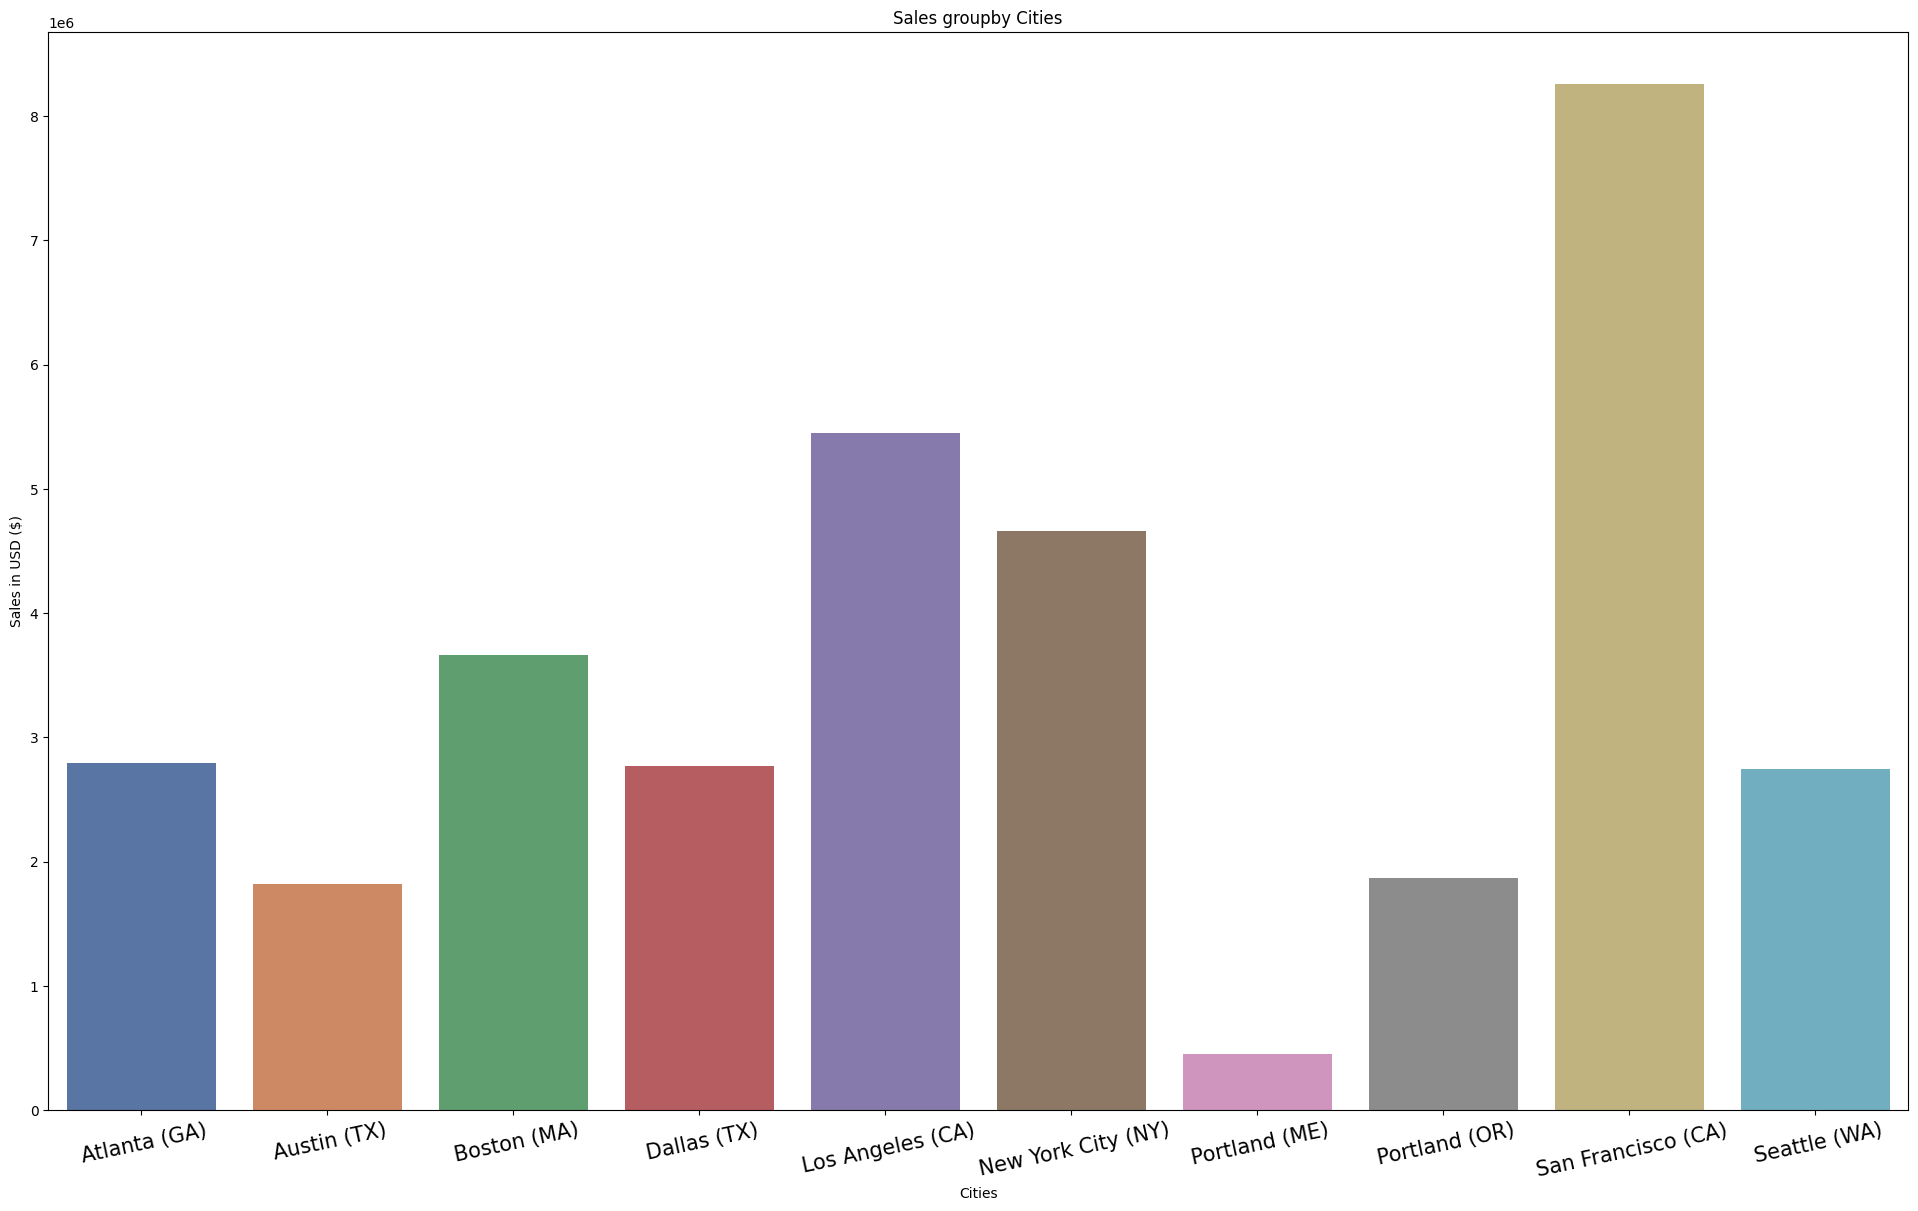

In [22]:
sales_gb_cities = all_data.groupby('Cities').sum().astype(int)
# Make a plt
plt.figure(figsize=(24, 14))
sns.barplot(
    x = sales_gb_cities.index,
    y = sales_gb_cities['Sale'],
    palette = 'deep'
)
plt.title('Sales groupby Cities')
plt.xlabel('Cities')
plt.xticks(
    fontsize=15,
    rotation=12
)
plt.ylabel('Sales in USD ($)')

Answer for Question 2:
- The City had the highest number of sales is San Francisco (SA): $8.262.203

### Question 3: What time should we display advertisement to maximize likelihood of customer's buying product?

In [23]:
import numpy as np

Text(0, 0.5, 'Number of Orders')

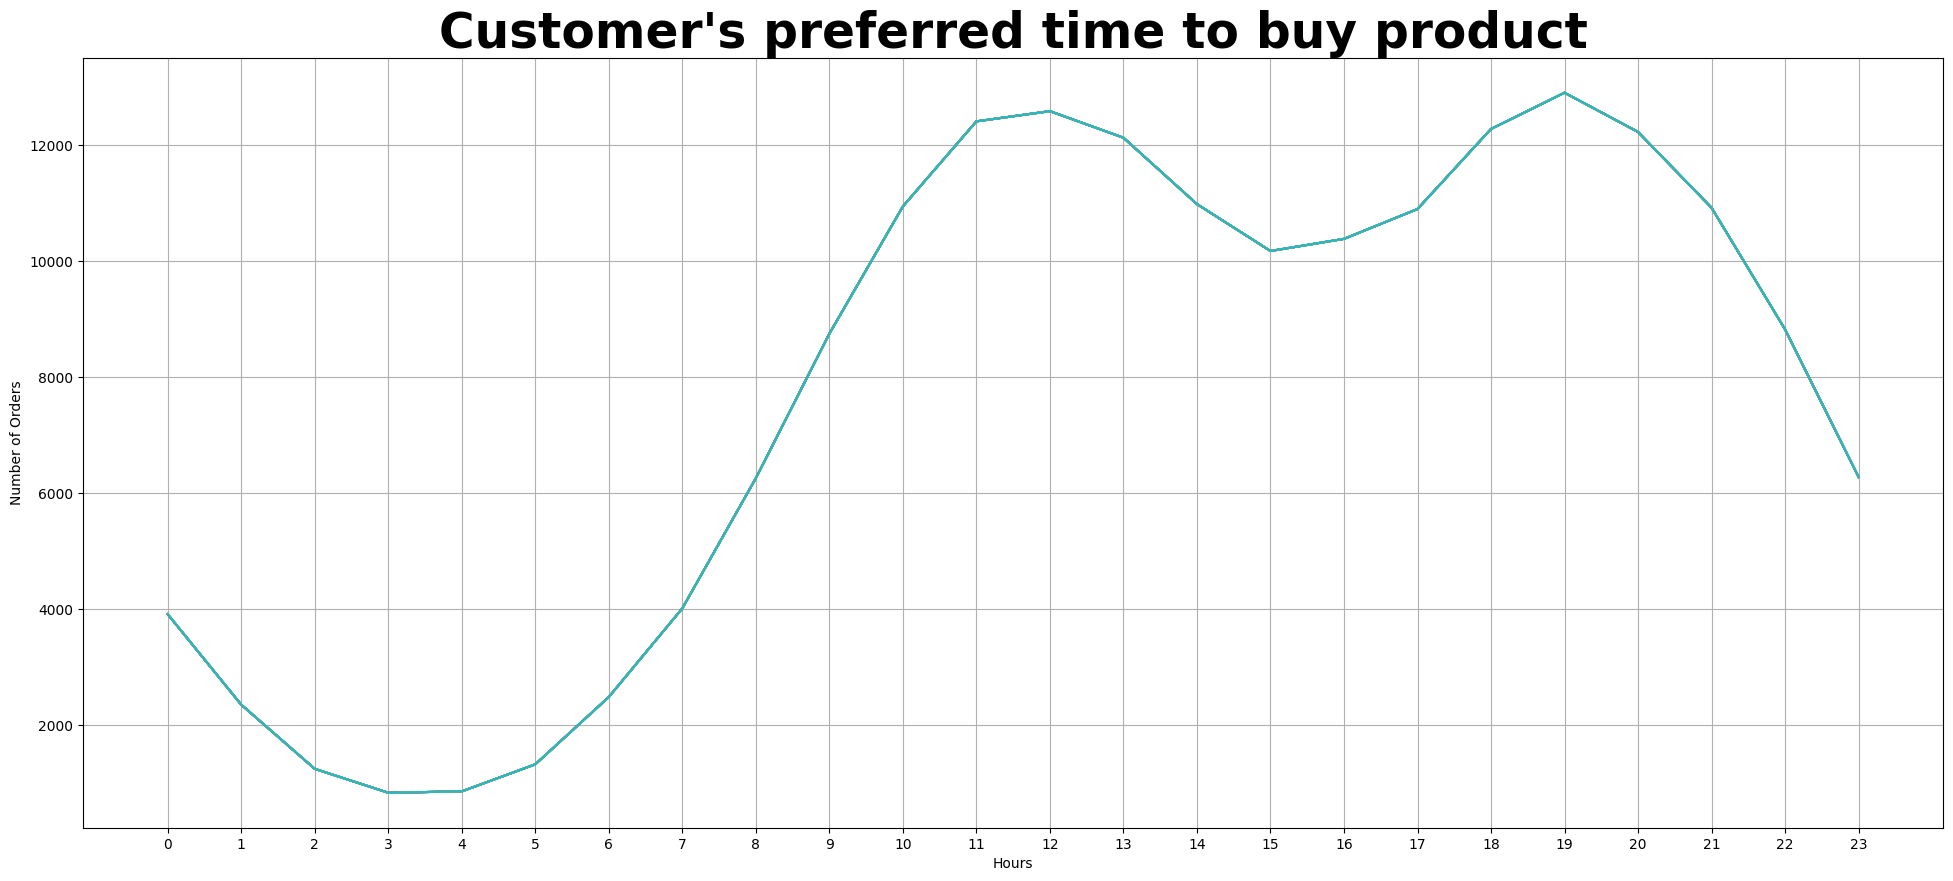

In [28]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(24,10))
plt.plot(hours, all_data.groupby('Hour').count()
)
plt.grid(True) # add grid in the plot
plt.title("Customer's preferred time to buy product", weight ='bold', fontsize=35)
plt.xlabel('Hours')
plt.xticks(ticks=hours)
plt.ylabel('Number of Orders')



Answer for Question 3:
We should display the advertisement during 9:00-14:00; 16:00-20:00

### Question 4: What products are most often sold together?